# Keras tunner

In [45]:
# pip install keras-tuner

In [46]:
# making the basic Machine learning pipeline works
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
# Splitting the dataset into the Training set and Test set


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [47]:
X_train.shape

(8000, 11)

In [48]:
# get the neccessary packages and libraries for the model
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [62]:
def build_model(hp):
    model = keras.Sequential()
    # the below for looop has been checking betweee 2 to 20 no of hidden layers per the ssearch of the best model
    for i in range(hp.Int('num_layers', 2, 20)):
        # hp is an inbuilt variable 
        # here in the below we use hp.Int to create neurons for the hidden layers min 32 to max 512 with step 32
        model.add(layers.Dense(units=hp.Int('units_'+str(i),
                                           min_value=32,
                                           max_value=512,
                                           step = 32),
                               #actvation is relu
                                           activation = 'relu'))
        #this is the ooutput layers
    model.add(layers.Dense(1, activation='sigmoid'))
            #in here the model optimizers are used to compile and check on with the optimizer and learnig rate specific value is checked using hp.choice
    model.compile(
                 optimizer= keras.optimizers.Adam(
                 hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [63]:
tuner = RandomSearch(
            build_model, objective='val_accuracy', max_trials=5,
    executions_per_trial = 3,
    directory = 'ANN',
    project_name='churn1')
#val_accuracy is with respect to test data

INFO:tensorflow:Reloading Oracle from existing project ANN/churn1/oracle.json
INFO:tensorflow:Reloading Tuner from ANN/churn1/tuner0.json


In [64]:
# get the info of the search 
tuner.search_space_summary()


Search space summary
Default search space size: 22
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [44]:
# pip install --upgrade tensorflow

In [66]:
tuner.search(X_train, y_train, epochs=5, validation_data = (X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [67]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [68]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <kerastuner.tuners.randomsearch.RandomSearch object at 0x7f4cda30b210>>

In [69]:
tuner.get_best_models()

In [70]:
# results summary of the search is here
tuner.results_summary()

Results summary
Results in ANN/churn1
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 20
units_0: 416
units_1: 128
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
units_19: 32
Score: 0.8668333292007446
Trial summary
Hyperparameters:
num_layers: 3
units_0: 160
units_1: 352
learning_rate: 0.001
units_2: 160
units_3: 320
units_4: 384
units_5: 416
units_6: 64
units_7: 512
units_8: 96
units_9: 128
units_10: 64
units_11: 64
units_12: 96
units_13: 288
units_14: 352
units_15: 320
units_16: 64
units_17: 512
units_18: 32
units_19: 64
Score: 0.8636666735013326
Trial summary
Hyperparameters:
num_layers: 11
units_0: 160
units_1: 416
learning_rate: 0.0001
units_2: 160
units_3: 352
units_4: 160
units_5: 192
units_6: 64
units_7: 256
units_8: 64
units_9: 

# building the best model and check the accuracy

In [17]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

Trial summary
Hyperparameters:
num_layers: 20
units_0: 416
units_1: 128
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
units_19: 32
Score: 0.8668333292007446

In [42]:

classifier = Sequential()

classifier.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# the second hidden layer
classifier.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=448, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=224, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=256, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=288, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=416, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=224, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=160, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=224, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=320, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=416, kernel_initializer='he_uniform', activation='relu'))
# classifier.add(Dense(units=320, kernel_initializer='he_uniform', activation='relu'))

#the output layer as this is a binary final neuron is 1 and as the activation sigmoid means becausse of the classificartion
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

#optimizer and compiling the model adam as its the best binary crossentropy as the classificatioon model
classifier.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=100,epochs=15)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 128)               1536      
_________________________________________________________________
dense_151 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_152 (Dense)            (None, 448)               29120     
_________________________________________________________________
dense_153 (Dense)            (None, 224)               100576    
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 225       
Total params: 139,713
Trainable params: 139,713
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
54/54 [==============================] - 1s 14ms/step - loss: 0.5896 - accuracy: 0.7602 - val_loss: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

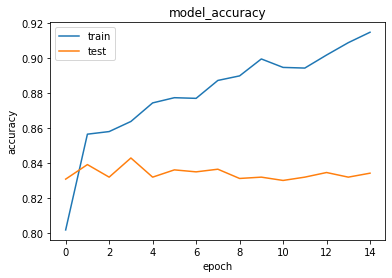

In [43]:
# using the histoy keys plot a diagram
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

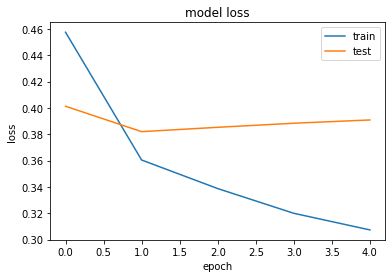

In [38]:
#geting the loss accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [39]:

y_pred = classifier.predict(X_test)

#making the condition to get the true or false according to the requirments of the domain
y_pred = (y_pred>0.5)


In [40]:
#making the confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_test, y_pred)
print(score)
print(cm)

0.853
[[1534   61]
 [ 233  172]]
